In [22]:
from dataclasses import dataclass
from typing import Dict, List, Optional, Set, Tuple


#Create class for basic data structure 

@dataclass
class Station:
    id: str
    name: str


@dataclass
class Connection:
    from_id: str
    to_id: str
    distance_km: float
    travel_time_min: float


@dataclass
class Neighbor:
    station_id: str
    time: float
    distance: float


#Create a data structure to store a line as a graph 

class TransitGraph:

    def __init__(self, stations: List[Station], connections: List[Connection]):

        self._stations: Dict[str, Station] = {st.id: st for st in stations}
        self._connections: Dict[Tuple[str, str], Connection] = {}
        self._neighbors: Dict[str, List[Neighbor]] = {}

        for con in connections:
            self._connections[(con.from_id, con.to_id)] = con

            if con.from_id not in self._neighbors:
                self._neighbors[con.from_id] = []

            self._neighbors[con.from_id].append(
                Neighbor(
                    station_id = con.to_id,
                    time = con.travel_time_min,
                    distance = con.distance_km,
                )
            )

    def get_all_stations(self):
        return list(self._stations.values())

    def get_neighbors(self, station_id: str):
        return self._neighbors.get(station_id, [])

    def get_connection(self, from_id: str, to_id: str):
        return self._connections.get((from_id, to_id), None)

    def get_station(self, station_id: str):
        return self._stations[station_id]


#Part that calculate the price or fare between stations(MRT Blue Line)

def calculate_mrt_fare(num_stops: int):

    if num_stops <= 1:
        return 17
    elif num_stops <= 2:
        return 20
    elif num_stops <= 3:
        return 22
    elif num_stops <= 4:
        return 25
    elif num_stops <= 5:
        return 27
    elif num_stops <= 6:
        return 30
    elif num_stops <= 7:
        return 32
    elif num_stops <= 8:
        return 35
    elif num_stops <= 9:
        return 37
    elif num_stops <= 10:
        return 40
    elif num_stops == 11:
        return 42
    else:
        return 45




def construct_path_result(graph: TransitGraph, station_ids: List[str]):

    station_objects = [graph.get_station(sid) for sid in station_ids]

    total_distance = 0.0
    total_time = 0.0

    for i in range(len(station_ids) - 1):
        frm = station_ids[i]
        to = station_ids[i + 1]

        connection = graph.get_connection(frm, to)
        if connection is None:
            continue

        total_distance += connection.distance_km
        total_time += connection.travel_time_min

    total_stops = max(len(station_ids) - 1, 0)
    fare_thb = calculate_mrt_fare(total_stops)

    result = {
        "station_ids": station_ids,
        "stations": [st.name for st in station_objects],
        "total_stops": total_stops,
        "total_distance_km": round(total_distance, 2),
        "total_time_min": round(total_time, 1),
        "mrt_fare_thb": fare_thb,
    }

    return result



# Data from MRT Blue Line as an example input
stations = [
    Station("BL01", "Tha Phra"),
    Station("BL02", "Charan 13"),
    Station("BL03", "Fai Chai"),
    Station("BL04", "Bang Khun Non"),
    Station("BL05", "Bang Yi Khan"),
    Station("BL06", "Sirindhorn"),
    Station("BL07", "Bang Phlat"),
    Station("BL08", "Bang O"),
    Station("BL09", "Bang Pho"),
    Station("BL10", "Tao Poon"),
    Station("BL11", "Bang Sue"),
    Station("BL12", "Kamphaeng Phet"),
    Station("BL13", "Chatuchak Park"),
    Station("BL14", "Phahon Yothin"),
    Station("BL15", "Lat Phrao"),
    Station("BL16", "Ratchadaphisek"),
    Station("BL17", "Sutthisan"),
    Station("BL18", "Huai Khwang"),
    Station("BL19", "Thailand Cultural Centre"),
    Station("BL20", "Phra Ram 9"),
    Station("BL21", "Phetchaburi"),
    Station("BL22", "Sukhumvit"),
    Station("BL23", "Queen Sirikit National Convention Centre"),
    Station("BL24", "Khlong Toei"),
    Station("BL25", "Lumphini"),
    Station("BL26", "Si Lom"),
    Station("BL27", "Sam Yan"),
    Station("BL28", "Hua Lamphong"),
    Station("BL29", "Wat Mangkon"),
    Station("BL30", "Sam Yot"),
    Station("BL31", "Sanam Chai"),
    Station("BL32", "Itsaraphap"),
    Station("BL33", "Bang Phai"),
    Station("BL34", "Bang Wa"),
    Station("BL35", "Phetkasem 48"),
    Station("BL36", "Phasi Charoen"),
    Station("BL37", "Bang Khae"),
    Station("BL38", "Lak Song"),
]

segment_distance_km = 1.2
segment_time_min = 3.0

connections: List[Connection] = []

# Main linear connections for a normal linear line
for i in range(len(stations) - 1):
    station_from = stations[i]
    station_to = stations[i + 1]

    connections.append(
        Connection(
            from_id = station_from.id,
            to_id = station_to.id,
            distance_km = segment_distance_km,
            travel_time_min = segment_time_min,
        )
    )
    connections.append(
        Connection(
            from_id = station_to.id,
            to_id = station_from.id,
            distance_km = segment_distance_km,
            travel_time_min = segment_time_min,
        )
    )

# Connect edges to make the graph to make it like the real MRT Blue Line that can swap to both Bang Phai and Itsaraphap

# Connect Itsaraphap and Tha Phra 
connections.append(
    Connection("BL32", "BL01", segment_distance_km, segment_time_min)
)
connections.append(
    Connection("BL01", "BL32", segment_distance_km, segment_time_min)
)

# Connect Tha Phra and Bang Phai 
connections.append(
    Connection("BL01", "BL33", segment_distance_km, segment_time_min)
)
connections.append(
    Connection("BL33", "BL01", segment_distance_km, segment_time_min)
)

graph = TransitGraph(stations, connections)

# Shortest path

In [23]:
# Shortest Path — Dijkstra 

def find_shortest_path(graph: TransitGraph, source_id: str, destination_id: str):

    distance: Dict[str, float] = {}
    previous: Dict[str, Optional[str]] = {}
    visited: Set[str] = set()

    for st in graph.get_all_stations():
        distance[st.id] = 0.0 if st.id == source_id else float("inf")
        previous[st.id] = None

    while True:
        current_id = None
        current_min = float("inf")

        for sid, dist in distance.items():
            if sid in visited:
                continue
            if dist < current_min:
                current_min = dist
                current_id = sid

        if current_id is None:
            break

        if current_id == destination_id:
            break

        visited.add(current_id)

        for neighbor in graph.get_neighbors(current_id):
            neighbor_id = neighbor.station_id

            if neighbor_id in visited:
                continue

            new_dist = distance[current_id] + 1.0

            if new_dist < distance[neighbor_id]:
                distance[neighbor_id] = new_dist
                previous[neighbor_id] = current_id

    path: List[str] = []
    walker: Optional[str] = destination_id

    while walker is not None:
        path.insert(0, walker)
        walker = previous[walker]

    if len(path) == 0 or path[0] != source_id:
        return None

    return construct_path_result(graph, path)

Pseudo code

function shortest_path(graph, start, destination):
    create a priority_queue
    distance = map with default value = infinity
    previous = map to store the path

    distance[start] = 0
    push (0, start) into priority_queue

    while priority_queue not empty:
        current_dist, current_node = pop smallest item

        if current_node == destination:
            break

        for neighbor, weight in graph[current_node]:
            new_dist = current_dist + weight

            if new_dist < distance[neighbor]:
                distance[neighbor] = new_dist
                previous[neighbor] = current_node
                push (new_dist, neighbor) into priority_queue

    return reconstruct_path(previous, start, destination)


Flowchart

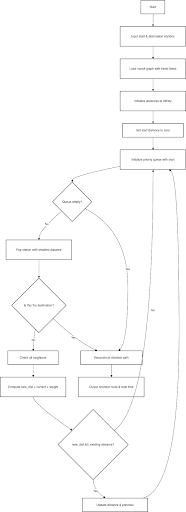

# Cheapest path

In [24]:
#  Cheapest Path  — Dijkstra

def find_cheapest_path(graph: TransitGraph, source_id: str, destination_id: str):

    distance: Dict[str, float] = {}
    previous: Dict[str, Optional[str]] = {}
    visited: Set[str] = set()

    for st in graph.get_all_stations():
        distance[st.id] = 0.0 if st.id == source_id else float("inf")
        previous[st.id] = None

    while True:
        current_id = None
        current_min = float("inf")

        for sid, dist in distance.items():
            if sid in visited:
                continue
            if dist < current_min:
                current_min = dist
                current_id = sid

        if current_id is None:
            break

        if current_id == destination_id:
            break

        visited.add(current_id)

        for neighbor in graph.get_neighbors(current_id):
            neighbor_id = neighbor.station_id

            if neighbor_id in visited:
                continue

            connection = graph.get_connection(current_id, neighbor_id)
            if connection is None:
                continue

            weight = connection.distance_km
            new_dist = distance[current_id] + weight

            if new_dist < distance[neighbor_id]:
                distance[neighbor_id] = new_dist
                previous[neighbor_id] = current_id

    path: List[str] = []
    walker: Optional[str] = destination_id

    while walker is not None:
        path.insert(0, walker)
        walker = previous[walker]

    if len(path) == 0 or path[0] != source_id:
        return None

    return construct_path_result(graph, path)

Pseudo code

function cheapest_path(graph, start, destination):
    create a priority_queue
    cost = map with default value = infinity
    previous = map to store path

    cost[start] = 0
    push (0, start) into priority_queue

    while priority_queue not empty:
        current_cost, current_node = pop smallest item

        if current_node == destination:
            break

        for neighbor, price in graph[current_node]:
            new_cost = current_cost + price

            if new_cost < cost[neighbor]:
                cost[neighbor] = new_cost
                previous[neighbor] = current_node
                push (new_cost, neighbor)

    return reconstruct_path(previous, start, destination)


Flowchart

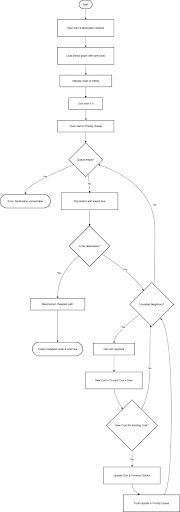

# Any path

In [25]:
#  Any Path — DFS

def find_any_path(graph: TransitGraph, source_id: str, destination_id: str):

    visited: Set[str] = set()
    current_path: List[str] = []
    found_flag = False

    def dfs(station_id: str):
        nonlocal found_flag

        visited.add(station_id)
        current_path.append(station_id)

        if station_id == destination_id:
            found_flag = True
            return True

        for neighbor in graph.get_neighbors(station_id):
            neighbor_id = neighbor.station_id

            if neighbor_id not in visited:
                if dfs(neighbor_id):
                    return True

        current_path.pop()
        return False

    dfs(source_id)

    if not found_flag:
        return None

    return construct_path_result(graph, current_path)

Flowchart

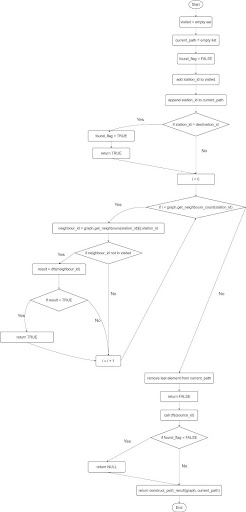

# All path

In [26]:
#  All Paths — DFS 

def find_all_paths(
    graph: TransitGraph,
    source_id: str,
    destination_id: str,
    max_paths: int = 50,
    max_depth: int = 60,
):

    all_paths: List[List[str]] = []
    visited: Set[str] = set()
    path_stack: List[str] = []

    def dfs(station_id: str, depth: int):

        if len(all_paths) >= max_paths:
            return

        if depth > max_depth:
            return

        if station_id == destination_id:
            all_paths.append(path_stack + [station_id])
            return

        visited.add(station_id)
        path_stack.append(station_id)

        neighbors = list(graph.get_neighbors(station_id))
        neighbors.sort(key=lambda n: n.time)

        for neighbor in neighbors:
            neighbor_id = neighbor.station_id

            if neighbor_id not in visited:
                dfs(neighbor_id, depth + 1)

        path_stack.pop()
        visited.remove(station_id)

    dfs(source_id, 0)

    if len(all_paths) == 0:
        return []

    all_paths.sort(key=len)

    result_list: List[Dict] = []
    for path_ids in all_paths:
        result_list.append(construct_path_result(graph, path_ids))

    shortest_key = "->".join(result_list[0]["station_ids"])

    enriched: List[Dict] = []
    for res in result_list:
        res_copy = dict(res)
        key = "->".join(res["station_ids"])
        res_copy["is_shortest"] = (key == shortest_key)
        enriched.append(res_copy)

    return enriched

Flowchart

![All Path.png](<attachment:All Path.png>)
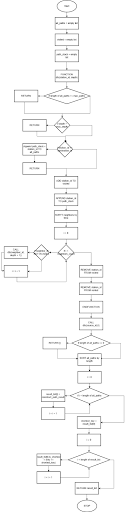

# Output

In [27]:
print("Shortest Path from Fai Chai to Bang Wa")
print(find_shortest_path(graph, "BL03", "BL34"))

print("\nCheapest Path from Fai Chai to Bang Wa")
print(find_cheapest_path(graph, "BL03", "BL34"))

print("\nAny Path from Fai Chai to Bang Wa")
print(find_any_path(graph, "BL03", "BL34"))

print("\nAll Paths from Fai Chai to Bang Wa")
all_results = find_all_paths(graph, "BL03", "BL34", max_paths=20, max_depth=60)
for i, r in enumerate(all_results, start=1):
    print(
        f"Path {i}: {r['stations']}, "
        f"stops={r['total_stops']}, "
        f"is_shortest={r['is_shortest']}"
    )


Shortest Path from Fai Chai to Bang Wa
{'station_ids': ['BL03', 'BL02', 'BL01', 'BL33', 'BL34'], 'stations': ['Fai Chai', 'Charan 13', 'Tha Phra', 'Bang Phai', 'Bang Wa'], 'total_stops': 4, 'total_distance_km': 4.8, 'total_time_min': 12.0, 'mrt_fare_thb': 25}

Cheapest Path from Fai Chai to Bang Wa
{'station_ids': ['BL03', 'BL02', 'BL01', 'BL33', 'BL34'], 'stations': ['Fai Chai', 'Charan 13', 'Tha Phra', 'Bang Phai', 'Bang Wa'], 'total_stops': 4, 'total_distance_km': 4.8, 'total_time_min': 12.0, 'mrt_fare_thb': 25}

Any Path from Fai Chai to Bang Wa
{'station_ids': ['BL03', 'BL02', 'BL01', 'BL32', 'BL33', 'BL34'], 'stations': ['Fai Chai', 'Charan 13', 'Tha Phra', 'Itsaraphap', 'Bang Phai', 'Bang Wa'], 'total_stops': 5, 'total_distance_km': 6.0, 'total_time_min': 15.0, 'mrt_fare_thb': 27}

All Paths from Fai Chai to Bang Wa
Path 1: ['Fai Chai', 'Charan 13', 'Tha Phra', 'Bang Phai', 'Bang Wa'], stops=4, is_shortest=True
Path 2: ['Fai Chai', 'Charan 13', 'Tha Phra', 'Itsaraphap', 'Bang Ph